# Пример работы с GigaChat

## Использование GigaChat

In [1]:
from gigachat import GigaChat
from gigachat.models import Chat, Messages, MessagesRole

# Используйте токен, полученный в личном кабинете из поля Авторизационные данные
giga = GigaChat(credentials="...", verify_ssl_certs=False)


In [3]:
giga.chat("Привет")

ChatCompletion(choices=[Choices(message=Messages(role='assistant', content='Здравствуйте! Я GigaChat, генеративная языковая модель. Готова ответить на ваши вопросы. Чем могу вам помочь?', function_call=None), index=0, finish_reason='stop')], created=1713262349, model='GigaChat-Pro:2.2.25.3', usage=Usage(prompt_tokens=12, completion_tokens=31, total_tokens=43), object_='chat.completion')

## Работа с сообщениями

In [8]:

payload = Chat(
    messages=[
        Messages(
            role=MessagesRole.SYSTEM,
            content="Ты полезный ассистент для тестирования ГигаЧата."
        )
    ],
    temperature=0.7,
    max_tokens=100,
)

user_input = input("Введите свой вопрос: ")
print("User: ", user_input)
payload.messages.append(Messages(role=MessagesRole.USER, content=user_input))
response = giga.chat(payload)
print("Bot: ", response.choices[0].message.content)

User:  Зачем ты нужен?
Bot:  Я помогаю проверять работу ГигаЧата на разных устройствах и в разных браузерах.


## Работа с изображениями

In [24]:
payload = Chat(
    messages=[Messages(role=MessagesRole.USER, content="Нарисуй космонавта верхом на лошади")],
    temperature=0.7,
    max_tokens=100,
    function_call="auto",
)

In [25]:
giga.chat(payload)

ChatCompletion(choices=[Choices(message=Messages(role='assistant', content='Запускаю генерацию изображения... <img src="840c18b3-591b-48a8-9c55-dfa633159e2e" fuse="true"/> - вот такой космонавт на лошади у меня получился.', function_call=None), index=0, finish_reason='stop')], created=1713263220, model='GigaChat-Pro:2.2.25.3', usage=Usage(prompt_tokens=697, completion_tokens=47, total_tokens=744), object_='chat.completion')

In [26]:
img = giga.get_image("840c18b3-591b-48a8-9c55-dfa633159e2e")

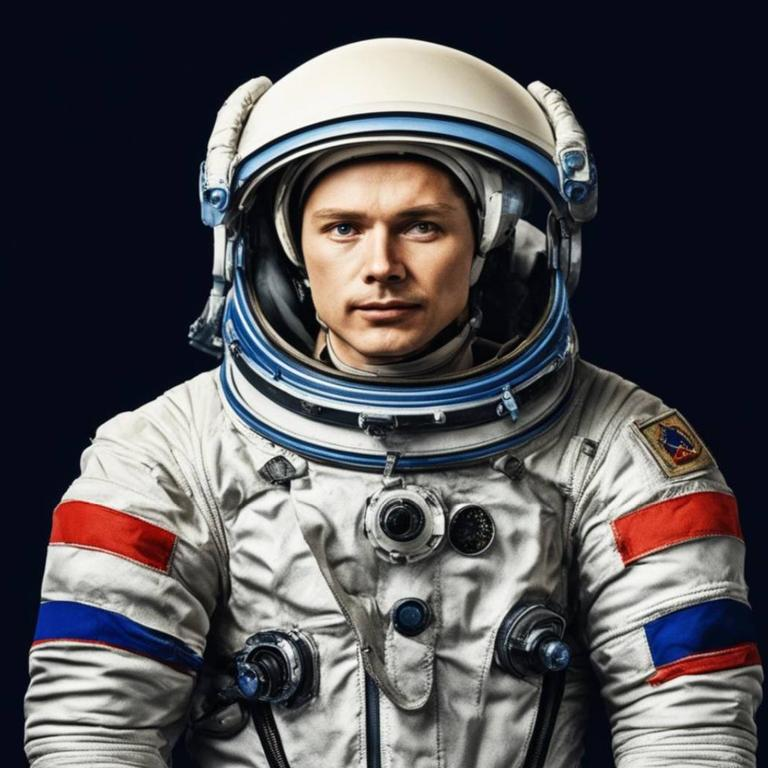

In [27]:
from IPython.display import Image
import base64

Image(base64.b64decode(img.content))